# Practical 3: Deep Feed-forward Networks
**IndabaX sudan 2019**

## Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called **"Fashion MNIST"**, consisting of small greyscale images of items of fashion. We consider the practical issues around generalisation to out-of-sample data and introduce some important techniques for addressing this.

Before diving into the Neural network part we first have an introduction to Tensorflow, a very popular deep learning framework that is used in all aspects of defining, training and testing models. 
## Learning objectives
* Understand the basics of Tensorflow
* Use **Tensorflow Eager** and **Keras Layers** to build a neural network archetecture
* Understand how a model is trained and evaluated
* Differentiate between **in-sample** and **out-of-sample** model performance
* Understand the concept of **train/validation/test split** and why it's useful
* Research at least 1 techniques that can be used to improve model **generalisation**

# Tensorflow
As described in Wikipedia TensorFlow is a computational framework for building machine learning models. It is the second generation system from Google Brain headed by Jeff Dean. Launched in early 2017, it has disrupted the ML world by bringing in numerous capabilities from scalability to building production ready models.

In other words, Tensorflow is a python library that provides matrix and list functionality and can work on multiple level of abstraction across multiple languages. Tensorflow is available on C++, python and recently on JavaScript.

In [2]:
#@title Imports (RUN ME!) { display-mode: "form" }

!pip install tensorflow-gpu==2.0.0-beta0 > /dev/null 2>&1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("TensorFlow executing eagerly: {}".format(tf.executing_eagerly()))

The system cannot find the path specified.


ModuleNotFoundError: No module named 'tensorflow'

For statrers, we can define a constant which is a tensor whose value cannot be changed at all. It can take many shapes and dimentions as the examples below show.

We can also declare variable tensors which values change. Their declaration is abit different but the code below shows the difference between the two:

In [3]:
#for declaring constants we use the ft.constant function
x1 = tf.constant(3)            #shape ()
x2 = tf.constant([3, 5, 7])    #shape (3,)
#we can use tf.stack to create higher dimentinal matricies
x3 = tf.stack([x2, x2])        #shape (2, 3)

#for declaring a variable we use the function tf.get_variable and we manuplate them using the tf.variable class
my_var = tf.get_variable("my_var", [1, 2, 3])

print (x1, x2, x3, my_var)

NameError: name 'tf' is not defined

As you might have noticed, running the above code results in printing tensor abstract but not the values themselves. This is because a Tensorflow code is just an abstract representation of what will be run in the Tensorflow session. A session encapsulates state of Tensorflow runtime and runs Tensorflow operations. Tesnorflow represents the written code in an unserlying graph. Take the following code, it is represented by the grave underneath it.

In [ ]:
sesions = tf.Session()
x = tf.constant([1, 2, 3], name = "x")
y = tf.constant([4, 5, 6], name = "y")
z1 = tf.add(x, y, name = "z1")
z2 = x * y
z3 = z2- z1

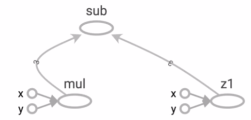

when we run the session thats when the value are inputed and we can get the values of the Tensors.

In [2]:
print(sessions.run(z3))
session.close()

NameError: name 'sessions' is not defined

### Basic TensorFlow operations
#### Addition and Subtraction

In [ ]:
a1 = tf.constant([1, 2, 3])
a2 = tf.constant([3, 4, 5])
a3 = a1 + a2 # (tf.add(a1, a2) also works. TensorFlow supports primitive operators)

with tf.Session() as session:
    print(session.run(a3))

# Result [4, 6, 8]

a4 = a1 - a2
with tf.Session() as session:
    ptint(session.run(a4))

# Result [-2, -2, -2]

#### Multiplication and Division

In [ ]:
a1 = tf.constant([1, 2, 3])
a2 = tf.constant([3, 4, 5])
a3 = a1 * a2 # (tf.mul(a1, a2) also works. TensorFlow supports primitive operators)

with tf.Session() as session:
    print(session.run(a3))

# Result [3, 8, 15]

a4 = a1/a2
with tf.Session() as session:
    print(a4.eval())  # eval() can be used instead of session.run() to compute the results of a particular variable.
    

# Result [0.34, 0.5, 0.6]

#### Reshape

In [ ]:
a1 = tf.constant([3, 5, 7],
                 [4, 6, 8])  # Shape is (2, 3)
a2 = tf.reshape(a1, [3, 2])

with tf.Session() as sess:
    sess.run(a2)
    print(a2)
    
# Result[[3, 5], [7, 4], [6, 8]]

Now that we got the basics of tensorflow we can delve into the meat of the practical and start on the Feed-forward Network
### The Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

In [4]:
# Tensorflow has convenient modules for loading a number of standard datasets
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

NameError: name 'tf' is not defined

### Optional extra reading: Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on *future* data that we have not seen yet. We say that we want our models to be able to **generalise** well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a **training set, a validation set and a test set**. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

### Construct a validation set
Next, we remove 10,000 images and labels from the training set to use as a validation set. We will come back to the validation set later! 

In [ ]:
# Construct a validation set from the last 10000 images and labels from
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

### What does the data look like?
Each image in the dataset consists of a 28 x 28 matrix of greyscale pixels. The values are between 0 and 255 where 0 represents black, 255 represents white and there are many shades of grey in-between. Each image is assigned a corresponding numerical label, so the image in ```train_images[i]``` has its corresponding label stored in ```train_labels[i]```. We also have a lookup array called ```text_labels``` to associate a text description with each of the numerical labels. For example, the label 1 is associated with the text description "Trouser".

The 2 cells below demonstrate how to visualise the input data. Make sure you understand what's happening, particularly how the indices correspond to individual items in the dataset. 

In [ ]:
# We use the Matplotlib plotting library to visualise an image selected at random from the training set
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray_r')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

In [ ]:
# Another view, showing 25 randomly selected images at a time
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap="gray_r")
    plt.xlabel(text_labels[train_labels[img_index]])

### Exploratory Task
Run the above cells multiple times to get a good sense of the dataset. Look at the general structure of the images and their corresponding labels. Can you spot some classes that might be difficult for a classifier to distinguish? If so, why do you think they would be difficult to distinguish? Chat to your neighbour about this. 


### Preparing the data with TensorFlow
At the moment, our training data consists of two large tensors. The images are stored in a tensor of shape $[50000, 28, 28]$, consisting of all the $28 \times 28$ images matrices stacked together. The labels are stored in a 1D vector of shape $[50000]$. We wish to train a model using **mini-batch stochastic gradient descent**. In order to do so, we need to shuffle the data and split it into smaller (mini-)batches. We also convert the data from numpy arrays to TensorFlow Tensors.

#### Questions
* Can you explain what the difference is between normal stochastic gradient descent and "batched" stochastic gradient descent? What is the purpose of chunking data into batches during training? Are there any trade-offs? What are they? **HINT**: Speak to your neighbours and tutors about this. You can also read [this blog post](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/) for more details.
* Why is it important to randomise the data before chunking it into batches? 

In order to do this batching (and shuffling) we will use the Tensorflow [Dataset API](https://www.tensorflow.org/api_docs/python/tf/data/Dataset), which is a set of simple reusable components that allow you to build efficient data pipelines. Data is said to "stream" through the pipeline, meaning that when something at the output of the pipeline wants data, the pipeline will provide that data as soon as it has enough, rather than waiting to process all the data. This allows you to easily build pipelines that work on large datasets without having to load it all into memory in one go!

We build this pipeline step-by-step:

We start by defining the ```batch_size``` hyperparameter of our model. This hyperparameter controls the sizes of the mini-batches (chunks) of data that we use to train the model. The value you use will affect the memory usage, speed of convergence and potentially also the performance of the model. It also interacts with the *learning rate* used in gradient descent. 

In [5]:
batch_size = 128

The first component we add will group the image and label tensors together into a tuple and then split them into individual entries - ie. 50000 tuples containing a (28, 28) dimensional image and 1D label associated with that image. The following line adds this splitting component to the pipeline.

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

The next thing we do is apply a map operation. This lets us run an arbitrary function on each element. The function we provide returns the image values divided by 255 and converted ('cast') to a float and the label converted to a 32-bit integer.

**NOTE**: "Lambda" functions are just one-line, anonymous functions. In this case, it defines a function that takes arguments x and y (before the colon), and outputs their manipulated values (after the colon).

In [ ]:
# Divide image values and cast to float so that they end up as a floating point number between 0 and 1
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))

Then we add a **shuffle** component. This returns a random element from the pipeline. Can you spot a potential problem here? 

**QUESTION**:  What might happen if the shuffle component didn't have a *buffer*?  **HINT**: Refer back to the discussion about the data pipeline and "data streaming through it" above.

In [ ]:
# Shuffle the examples.
train_ds = train_ds.shuffle(buffer_size=batch_size * 10)

The final component in our pipeline is the batch component. This just requests `batch_size` elements from the previous pipeline component, groups them together into a single tensor and returns that.

In [ ]:
# Now "chunk" the examples into batches
train_ds = train_ds.batch(batch_size)

# The output of this pipeline will be tuples of tensors containing images and labels.
# The images will be of shape (batch_size, 28, 28) and the labels of shape (batch_size, )

Finally, we apply the same pre-processing (converting to Tensors and normalising the values to lie between 0 and 1) to the validation set. 

In [ ]:
# Don't worry about this for now, we will use the validation set later
val_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))

## Define the model
In this section we'll build a classifier. A **classifier** is a function that takes an object's characteristics (or "features") as inputs and outputs a prediction of the class (or group) that the object belongs to. It may make a single prediction for each input or it may output some score (for example a probability) for each of the possible classes. Specifically, we will build a classifier that takes in (a batch of) 28 x 28 Fashion MNIST images as we've seen above, and outputs predictions about which class the image belongs to. 

For each (batch of) input images, we will use a **feed-forward neural network** to compute un-normalised scores (also known as **logits**) for each of the 10 possible classes that the image could belong to. We can then **classify** the image as belonging to the class which receives the highest score, or we can quantify the model's "confidence" about the classifications by converting the scores into a probability distribution. 

A feed-forward neural network consisting of $N$ layers, applied to an input vector $\mathbf{x}$ can be defined as:

\begin{equation}
\mathbf{f_0} = \mathbf{x} \\
\mathbf{f_i} = \sigma_i(\mathbf{W_if_{i-1}} + \mathbf{b_i}) \ \ \ i \in [1, N]
\end{equation}

Each layer has a particular number, $m_i$, of neurons. The parameters of a layer consist of a matrix $\mathbf{W_i} \in \mathbb{R}^{m_i \times m_{i-1}}$ and bias vector $\mathbf{b_i} \in \mathbb{R}^{m_i}$. Each layer also has a non-linear activation function $\sigma_i$. 

**QUESTION**: Why do you think the activation functions need to be *non-linear*? What would happen if they were *linear*? **HINT**: If you're stuck, consider the very simplest case of an identity activation (which essentially does nothing) and ignore the biases. 


### Optional extra reading: Activation functions



Activation functions are a core ingredient in deep neural networks. In fact they are what allows us to make use of multiple layers in a neural network. There are a number of different activation functions, each of which are more or less useful under different circumstances. The four activation functions that you are most likely to encounter are, arguably, [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU), [Tanh](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh), [Sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid), and [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax). 

ReLU, has in recent years, become the default choice for use in MLPs and Convolutional Neural Networks (CNNs). ReLU has two advantages over Tanh and Sigmoid: it is computationally much more efficient, and, it allows us to use deeper networks because it does not suffer from [vanishing gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem). As a result of their success, a number of ReLU variants, such as [LeakyRelu](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LeakyReLU) and [PReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/PReLU), have been developed.

Sigmoid and Softmax activations are often found after the last layer in binary and multi-class classification networks, respectively, as they transform the outputs of the network in such a way that we can interpret them as class probabilities.

Both Tanh and Sigmoid are found in LSTM and GRU recurrent neural networks, which we will find out more about in the coming days. They are also useful in MLPs and CNNs where we want the output to be bounded between -1 and 1 (Tanh) or 0 and 1 (Sigmoid).

Read more about activation functions [here](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6). 